In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [43]:
league = 'Bundesliga'
leagues = ['PremierLeague', 'LaLiga', 'SerieA']#, 'Bundesliga']
#leagues = [league]
data = 'Testing'
test = pd.DataFrame()
new = pd.DataFrame()
merged = pd.DataFrame()
for league in leagues:
    #merged1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/{data}/{league}/{league}_OU2.5Target_.csv')
    #test1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/{data}/{league}/{league}_OU2.5Target_.csv')
    #new1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/cache/{league}/new.csv')
    #test = pd.concat([test, test1])
    #new = pd.concat([new, new1])
    
    merged1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/{data}/{league}/{league}_OU2.5Target_.csv')
    merged = pd.concat([merged, merged1])
merged = merged.sort_values('Date')

prem = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/PremierLeague/PremierLeague_OU2.5Target_.csv')
laliga = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/LaLiga/LaLiga_OU2.5Target_.csv')
seriea = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/SerieA/SerieA_OU2.5Target_.csv')
bundesliga = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/Bundesliga/Bundesliga_OU2.5Target_.csv')



In [8]:
'''
#merged = test.merge(new[['GameID', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on='GameID_x', right_on='GameID').drop_duplicates(['GameID'])
merged = test.merge(new[['Date','Team', 'Opponent', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on=['Date','Team_x', 'Opponent_x'], right_on=['Date','Team', 'Opponent'])#.drop_duplicates(['GameID'])
merged['avgOverPred'] = (merged['class_1_x'] + merged['class_1_y']) / 2
merged['avgUnderPred'] = (merged['class_0_x'] + merged['class_0_y']) / 2
merged['impliedOverOdds'] = (1 / merged['O2.5'])
merged['impliedUnderOdds'] = (1 / merged['U2.5'])

betAmt = 10
merged['EVO2.5'] = (merged['avgOverPred'] * (merged['O2.5'] * betAmt - betAmt)) - (1 - merged['avgOverPred']) * betAmt 
merged['EVU2.5'] = (merged['avgUnderPred'] * (merged['U2.5'] * betAmt - betAmt)) - (1 - merged['avgUnderPred']) * betAmt 
merged = merged.sort_values('Date')
'''

"\n#merged = test.merge(new[['GameID', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on='GameID_x', right_on='GameID').drop_duplicates(['GameID'])\nmerged = test.merge(new[['Date','Team', 'Opponent', 'O2.5', 'U2.5', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on=['Date','Team_x', 'Opponent_x'], right_on=['Date','Team', 'Opponent'])#.drop_duplicates(['GameID'])\nmerged['avgOverPred'] = (merged['class_1_x'] + merged['class_1_y']) / 2\nmerged['avgUnderPred'] = (merged['class_0_x'] + merged['class_0_y']) / 2\nmerged['impliedOverOdds'] = (1 / merged['O2.5'])\nmerged['impliedUnderOdds'] = (1 / merged['U2.5'])\n\nbetAmt = 10\nmerged['EVO2.5'] = (merged['avgOverPred'] * (merged['O2.5'] * betAmt - betAmt)) - (1 - merged['avgOverPred']) * betAmt \nmerged['EVU2.5'] = (merged['avgUnderPred'] * (merged['U2.5'] * betAmt - betAmt)) - (1 - merged['avgUnderPred']) * betAmt \nmerged = merged.sort_values('Date')\n"

In [44]:
#merged[(merged['EVO2.5'] > over_EV) & (merged['avgOverPred'] >= over_percent_confidence)].shape[0]
#merged[(merged['EVU2.5'] > under_EV) & (merged['avgUnderPred'] >= under_percent_confidence)].shape[0] 

In [45]:
#merged[((merged['EVU2.5'] > 0) & (merged['actual_x'] == 0)) | ((merged['EVO2.5'] > 0) & (merged['actual_x'] == 1))].shape[0] /merged[((merged['EVU2.5'] > 0) | (merged['EVO2.5'] > 0))].shape[0] 


In [46]:
#over_percent_confidence = 0.60
#under_percent_confidence = 0.60
#over_EV = 0
#under_EV = 0
#merged[((merged['EVO2.5'] > over_EV) & (merged['actual_x'] == 1)) & (merged['avgOverPred'] >= over_percent_confidence)].shape[0] / merged[(merged['EVO2.5'] > over_EV) & (merged['avgOverPred'] >= over_percent_confidence)].shape[0]

In [47]:
#merged[((merged['EVU2.5'] > under_EV) & (merged['actual_x'] == 0)) & (merged['avgUnderPred'] >= under_percent_confidence)].shape[0] / merged[(merged['EVU2.5'] > under_EV) & (merged['avgUnderPred'] >= under_percent_confidence)].shape[0] 

In [13]:
'''
over_bank = 100
b = merged['O2.5'] - 1
p = merged['avgOverPred']
merged['overBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2

under_bank = 100
b = merged['U2.5'] - 1
p = merged['avgUnderPred']
merged['underBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2
''' 

"\nover_bank = 100\nb = merged['O2.5'] - 1\np = merged['avgOverPred']\nmerged['overBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2\n\nunder_bank = 100\nb = merged['U2.5'] - 1\np = merged['avgUnderPred']\nmerged['underBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2\n"

In [147]:
def calculate_profit_ou(merged, bankroll, over_odds_to_bet, under_odds_to_bet):
    ev = ['EVO2.5', 'EVU2.5']
    target = ['O2.5', 'U2.5']
    prob = ['avgOverPred', 'avgUnderPred']
    bank_graph = []
    over_graph = []
    under_graph = []
    over_bets = []
    num_over = 0
    under_bets = []
    num_under = 0
    over_bank = bankroll# // 2
    under_bank = bankroll# // 2
    #over_odds_to_bet = 1#1.5
    #under_odds_to_bet = 1#1.5

    b = merged['O2.5'] - 1
    p = merged['avgOverPred']
    #merged['overBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2

    b = merged['U2.5'] - 1
    p = merged['avgUnderPred']
    #merged['underBetAmt_KellyCrit'] = ((b * p - (1-p)) / b) * over_bank / 2
    for i in range(merged.shape[0]):
        #ev = [(merged.iloc[i, merged.columns.get_loc('avgOverPred') * (merged.iloc[i, merged.columns.get_loc('O2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgOverPred')) * betAmt, (merged.iloc[i, merged.columns.get_loc('avgUnderPred') * (merged.iloc[i, merged.columns.get_loc('U2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgUnderPred')) * betAmt]
        b = merged.iloc[i, merged.columns.get_loc(target[0])] - 1
        p = merged.iloc[i, merged.columns.get_loc(prob[0])]
        #bet0 = merged.iloc[i, merged.columns.get_loc('overBetAmt_KellyCrit')]
        bet0 = ((b * p - (1-p)) / b) * over_bank / 4#0.02 * bankroll
        bet0 = .02 * over_bank
        bet0 = 20
        #ev0 = (merged.iloc[i, merged.columns.get_loc('avgOverPred')] * (merged.iloc[i, merged.columns.get_loc('O2.5')] * bet0 - bet0)) - (1 - merged.iloc[i, merged.columns.get_loc('avgOverPred')]) * bet0 
        b = merged.iloc[i, merged.columns.get_loc(target[0])] - 1
        p = merged.iloc[i, merged.columns.get_loc(prob[0])]
        #bet1 = merged.iloc[i, merged.columns.get_loc('underBetAmt_KellyCrit')]
        bet1 = ((b * p - (1-p)) / b) * under_bank / 4#0.02 * bankroll
        bet1 = .02 * under_bank
        bet1 = 20
        ev1 = (merged.iloc[i, merged.columns.get_loc('avgUnderPred')] * (merged.iloc[i, merged.columns.get_loc('U2.5')] * bet1- bet1)) - (1 - merged.iloc[i, merged.columns.get_loc('avgUnderPred')]) * bet1
        ev0 = merged.iloc[i, merged.columns.get_loc(ev[0])]
        ev1 = merged.iloc[i, merged.columns.get_loc(ev[1])]
        if ev0 > 0 and merged.iloc[i, merged.columns.get_loc(prob[0])] > 0.6 and merged.iloc[i, merged.columns.get_loc(target[0])] > over_odds_to_bet:
            
            protential_profit = (bet0 * merged.iloc[i, merged.columns.get_loc(target[0])] - bet0)# * merged.loc[i, ['actual_x']]
            if merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet0
            
            over_bank += actual_profit
            over_graph.append(over_bank)
            under_graph.append(under_bank)
            num_over += 1
            over_bets.append(num_over)
            under_bets.append(num_under)
            '''
            bankroll += actual_profit
            over_graph.append(bankroll)
            under_graph.append(bankroll)
            '''
        elif ev1 > 0 and merged.iloc[i, merged.columns.get_loc(prob[1])] > 0.6 and merged.iloc[i, merged.columns.get_loc(target[1])] > under_odds_to_bet:
            #b = merged.iloc[i, merged.columns.get_loc(target[1])] - 1
            #p = merged.iloc[i, merged.columns.get_loc(prob[1])]
            #bet = ((b * p - (1-p)) / b) * bankroll / 2#0.02 * bankroll
            #bet = .01 * bankroll
            #bet = 10
            protential_profit = (bet1 * merged.iloc[i, merged.columns.get_loc(target[1])] - bet1)# * merged.loc[i, ['actual_x']]
            if not merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet1
            
            under_bank += actual_profit
            over_graph.append(over_bank)
            under_graph.append(under_bank)
            num_under += 1
            over_bets.append(num_over)
            under_bets.append(num_under)
            '''
            bankroll += actual_profit
            over_graph.append(bankroll)
            under_graph.append(bankroll)
            '''
        else:
            
            actual_profit = 0
            under_graph.append(under_bank)
            over_graph.append(over_bank)
            over_bets.append(num_over)
            under_bets.append(num_under)
            '''
            actual_profit = 0
            under_graph.append(bankroll)
            over_graph.append(bankroll)
            '''
        #print(merged.iloc[i, merged.columns.get_loc('Date')], protential_profit, actual_profit, bankroll)
        bankroll += actual_profit
        bank_graph.append(bankroll)
        
    return bank_graph, over_graph, under_graph, bankroll, over_bets, under_bets

In [156]:
over_odds_to_bet = [x * 0.1 +1 for x in range(3,12)]
under_odds_to_bet = [x * 0.1 +1 for x in range(3,12)]
leagues = ['PremierLeague', 'LaLiga', 'SerieA']
perms = []
leagues = ['Bundesliga']
for i in range(1,len(leagues)+1):
    perms.append(list(combinations(leagues, i)))

li = []
for over_odds in over_odds_to_bet:
    for under_odds in over_odds_to_bet:
        #for l in perms:
        bank_merged, over_merged, under_merged, bankroll_merged, over_bets_merged, under_bets_merged = calculate_profit_ou(bundesliga, 500, over_odds, under_odds)
        li.append((over_odds, under_odds, bank_merged[-1], over_merged[-1], under_merged[-1]))

In [157]:
li.sort(key=lambda x:x[2], reverse=True)
print(li)
# prem: 1.6, 1.4
# laliga 1.5, 1.7
# seriea: 1.5, 1.7 - but under loses money no matter the odds bet on

[(2.1, 1.7000000000000002, 523.0000000000001, 500, 523.0000000000001), (1.9, 1.7000000000000002, 522.2, 499.2, 523.0000000000001), (2.1, 1.3, 521.2, 500, 521.2), (2.1, 1.4, 521.2, 500, 521.2), (2.1, 1.5, 521.2, 500, 521.2), (2.1, 1.6, 521.2, 500, 521.2), (1.9, 1.3, 520.4000000000001, 499.2, 521.2), (1.9, 1.4, 520.4000000000001, 499.2, 521.2), (1.9, 1.5, 520.4000000000001, 499.2, 521.2), (1.9, 1.6, 520.4000000000001, 499.2, 521.2), (2.0, 1.7000000000000002, 503.0000000000001, 480, 523.0000000000001), (2.0, 1.3, 501.2000000000001, 480, 521.2), (2.0, 1.4, 501.2000000000001, 480, 521.2), (2.0, 1.5, 501.2000000000001, 480, 521.2), (2.0, 1.6, 501.2000000000001, 480, 521.2), (2.1, 1.8, 492.6, 500, 492.6), (1.9, 1.8, 491.8, 499.2, 492.6), (1.8, 1.7000000000000002, 482.2000000000001, 459.2, 523.0000000000001), (2.1, 1.9, 482.0, 500, 482.0), (2.1, 2.0, 482.0, 500, 482.0), (1.9, 1.9, 481.2, 499.2, 482.0), (1.9, 2.0, 481.2, 499.2, 482.0), (1.8, 1.3, 480.4000000000001, 459.2, 521.2), (1.8, 1.4, 480

In [86]:
def plot(dates, over, under, bank, over_bets, under_bets):
    fig, ax = plt.subplots()
    #ax.plot(dates, bank)
    ax.plot(dates, over, label='over')
    ax.plot(dates, under, label='under')
    ax.plot(dates, bank, label='bank')
    #ax.plot(dates, over_bets, label='num_over')
    #ax.plot(dates, under_bets, label='num_under')
    ax.tick_params(axis='x',rotation=90)
    date_range = [dates[0], dates[len(dates)//2],dates[-1]]#pd.date_range(dates[0], dates[-1], periods = 10).date
    ax.set_xticks(list(date_range))
    leg = ax.legend()
    plt.show()

In [158]:
bank_merged, over_merged, under_merged, bankroll_merged, over_bets_merged, under_bets_merged = calculate_profit_ou(merged, 500, 1.6, 1.5)
bank_prem, over_prem, under_prem, bankroll_prem, over_bets_prem, under_bets_prem = calculate_profit_ou(prem, 500, 1.6, 1.4)
bank_laliga, over_laliga, under_laliga, bankroll_laliga, over_bets_laliga, under_bets_laliga = calculate_profit_ou(laliga, 500, 1.5, 1.7)
bank_seriea, over_seriea, under_seriea, bankroll_seriea, over_bets_seriea, under_bets_seriea = calculate_profit_ou(seriea, 500, 1.5, 1.7)
bank_bundesliga, over_bundesliga, under_bundesliga, bankroll_bundesliga, over_bets_bundesliga, under_bets_bundesliga = calculate_profit_ou(bundesliga, 500, 2.1, 1.7)
print(over_bets_merged[-1], under_bets_merged[-1], over_bets_prem[-1], under_bets_prem[-1], over_bets_laliga[-1], under_bets_laliga[-1], over_bets_seriea[-1], under_bets_seriea[-1], 1.6, 1.5)

301 233 167 53 54 34 197 44 1.6 1.5


In [149]:
print(bank_merged[-1] - 500, bank_prem[-1] + bank_laliga[-1] + over_seriea[-1] - 1500)

823.6000000000049 1073.0000000000014


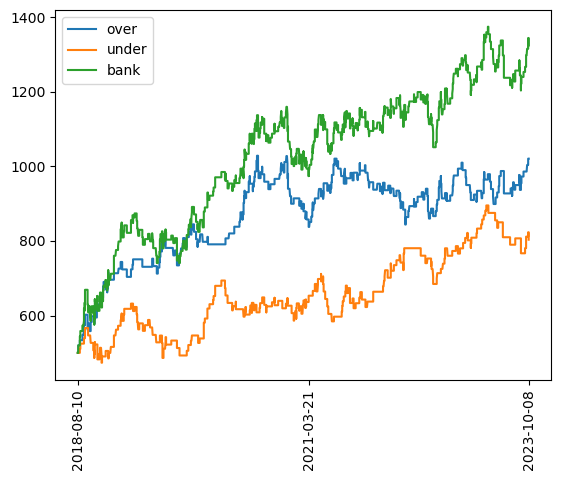

In [154]:
plot(np.array(merged['Date']), over_merged, under_merged, bank_merged, over_bets_merged, under_bets_merged)

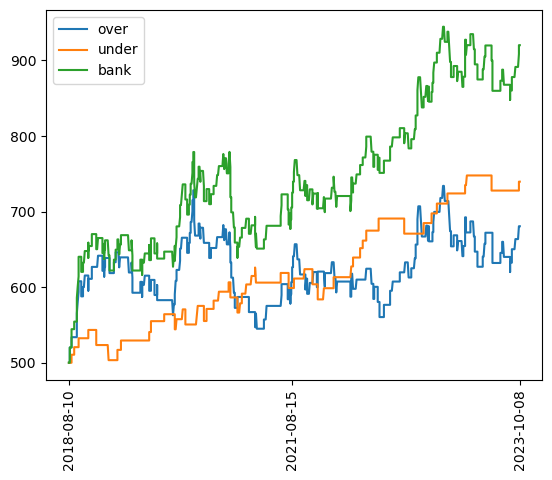

In [151]:
plot(np.array(prem['Date']), over_prem, under_prem, bank_prem, over_bets_prem, under_bets_prem)
#print(prem['Date'].shape, len(under_bets_prem))

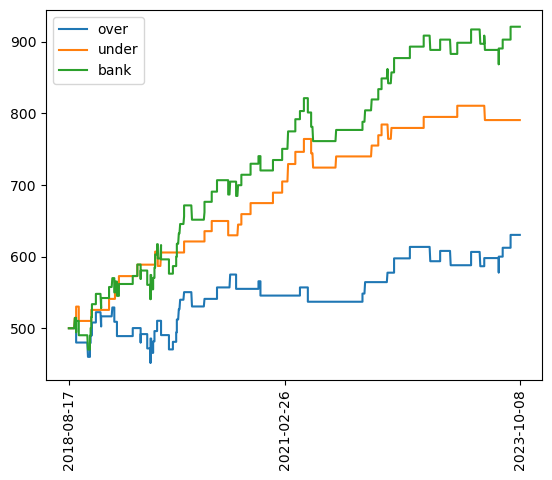

In [152]:
plot(np.array(laliga['Date']), over_laliga, under_laliga, bank_laliga, over_bets_laliga, under_bets_laliga)

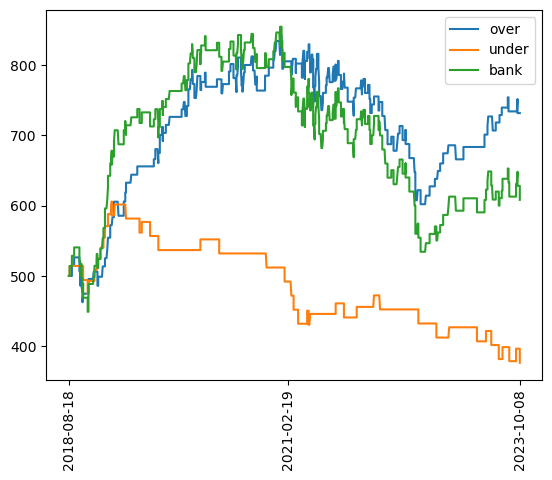

In [153]:
plot(np.array(seriea['Date']), over_seriea, under_seriea, bank_seriea, over_bets_seriea, under_bets_seriea)

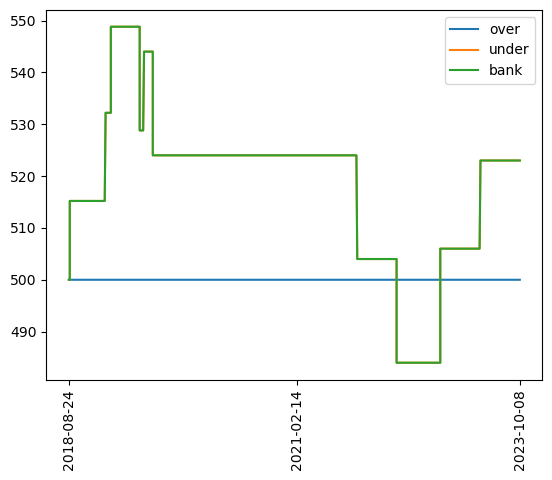

In [159]:
plot(np.array(bundesliga['Date']), over_bundesliga, under_bundesliga, bank_bundesliga, over_bets_bundesliga, under_bets_bundesliga)

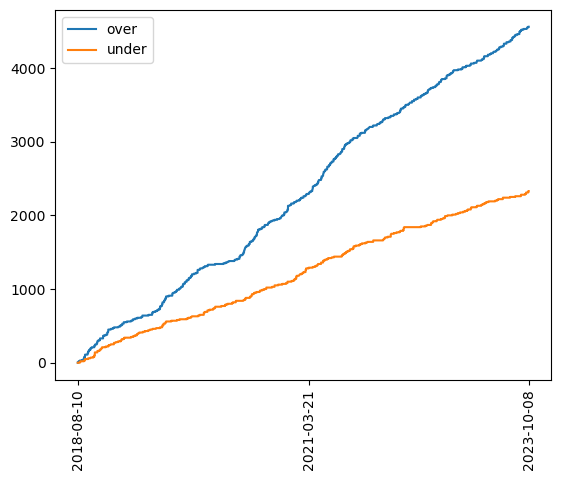

In [84]:
fig, ax = plt.subplots()
dates = np.array(merged['Date'])
#ax.plot(dates, bank)
ax.plot(dates, over_bets, label='over')
ax.plot(dates, under_bets, label=
'under')
ax.tick_params(axis='x',rotation=90)
date_range = [dates[0], dates[len(dates)//2],dates[-1]]#pd.date_range(dates[0], dates[-1], periods = 10).date
#print(list(date_range))
ax.set_xticks(list(date_range))
leg = ax.legend()
plt.show()

In [27]:
merged[(merged['EVO2.5'] > 0) | (merged['EVU2.5'] > 0)]

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,Team,Opponent,O2.5,U2.5,TeamWinOdds,DrawOdds,OpponentWinOdds,avgOverPred,avgUnderPred,impliedOverOdds,impliedUnderOdds,EVO2.5,EVU2.5
0,0,7260,2020-09-12,Fulham,Arsenal,1,0.38,0.62,7260,Arsenal,Fulham,1,0.39,0.61,Fulham,Arsenal,1.72,1.84,6.00,4.33,1.53,0.615,0.385,0.581395,0.543478,0.5780,-2.9160
1,2,7261,2020-09-12,Crystal Palace,Southampton,0,0.62,0.38,7261,Southampton,Crystal Palace,0,0.59,0.41,Crystal Palace,Southampton,2.20,1.70,3.10,3.25,2.37,0.395,0.605,0.454545,0.588235,-1.3100,0.2850
2,4,7262,2020-09-12,Leeds,Liverpool,1,0.58,0.42,7262,Liverpool,Leeds,1,0.57,0.43,Leeds,Liverpool,1.53,2.62,9.50,6.00,1.28,0.425,0.575,0.653595,0.381679,-3.4975,5.0650
4,8,7264,2020-09-13,Tottenham,Everton,0,0.35,0.65,7264,Everton,Tottenham,0,0.43,0.57,Tottenham,Everton,1.90,1.79,1.83,3.60,4.33,0.610,0.390,0.526316,0.558659,1.5900,-3.0190
5,10,7265,2020-09-13,Leicester,West Brom,1,0.48,0.52,7265,West Brom,Leicester,1,0.45,0.55,Leicester,West Brom,1.90,1.73,1.95,3.60,3.80,0.535,0.465,0.526316,0.578035,0.1650,-1.9555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2372,8471,2023-10-07,Fulham,Sheffield United,1,0.45,0.55,8471,Sheffield United,Fulham,1,0.45,0.55,Fulham,Sheffield United,1.96,2.07,1.62,3.80,6.00,0.550,0.450,0.510204,0.483092,0.7800,-0.6850
1188,2376,8473,2023-10-07,Forest,Crystal Palace,0,0.67,0.33,8473,Crystal Palace,Forest,0,0.81,0.19,Forest,Crystal Palace,2.25,1.59,3.60,3.10,2.20,0.260,0.740,0.444444,0.628931,-4.1500,1.7660
1193,2386,8478,2023-10-08,Man City,Arsenal,0,0.42,0.58,8478,Arsenal,Man City,0,0.43,0.57,Man City,Arsenal,1.75,1.82,2.40,3.30,2.90,0.575,0.425,0.571429,0.549451,0.0625,-2.2650
1191,2382,8476,2023-10-08,Liverpool,Brighton,1,0.42,0.58,8476,Brighton,Liverpool,1,0.43,0.57,Liverpool,Brighton,1.36,3.45,2.20,3.80,3.00,0.575,0.425,0.735294,0.289855,-2.1800,4.6625


In [1859]:
merged1[((merged1['EVTeamWin'] > -1) & (merged1['class_1_x'] >= 0.5))]

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,GameID,TeamWinOdds,DrawOdds,OpponentWinOdds,avgTeamWinPred,impliedTeamWinOdds,EVTeamWin
10,10,6085,2018-08-19,Sevilla,Rayo Vallecano,1,0.38,0.62,6085,Rayo Vallecano,Sevilla,0,0.67,0.33,6085,2.14,3.60,3.25,0.47,0.467290,0.058
52,52,6110,2018-09-15,Valencia,Betis,0,0.29,0.71,6110,Betis,Valencia,0,0.83,0.17,6110,1.75,3.75,4.75,0.69,0.571429,2.075
60,60,6114,2018-09-16,Espanyol,Levante,1,0.38,0.62,6114,Levante,Espanyol,0,0.80,0.20,6114,1.72,3.60,5.25,0.66,0.581395,1.352
66,66,6117,2018-09-16,Sevilla,Getafe,0,0.23,0.77,6117,Getafe,Sevilla,1,0.67,0.33,6117,1.55,4.00,7.00,0.64,0.645161,-0.080
72,72,6121,2018-09-22,Eibar,Leganes,1,0.46,0.54,6121,Leganes,Eibar,0,0.73,0.27,6121,2.04,3.20,4.00,0.46,0.490196,-0.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,3896,8036,2023-09-24,Las Palmas,Granada,1,0.39,0.61,8036,Granada,Las Palmas,0,0.66,0.34,8036,1.95,3.50,3.60,0.59,0.512821,1.505
3898,3898,8037,2023-09-24,Real Madrid,Atletico,0,0.50,0.50,8037,Atletico,Real Madrid,1,0.73,0.27,8037,2.55,3.40,2.70,0.54,0.392157,3.770
3904,3904,8040,2023-09-26,Sevilla,Almeria,1,0.40,0.60,8040,Almeria,Sevilla,0,0.68,0.32,8040,1.67,3.80,5.00,0.63,0.598802,0.521
3930,3930,8053,2023-09-30,Real Madrid,Girona,1,0.39,0.61,8053,Girona,Real Madrid,0,0.71,0.29,8053,1.95,4.00,3.50,0.64,0.512821,2.480


In [1858]:
merged1[((merged1['EVTeamWin'] > -1) & (merged1['actual_x'] == 1) & (merged1['class_1_x'] >= 0.5))]

,Unnamed: 0,GameID_x,Date,Team_x,Opponent_x,actual_x,class_0_x,class_1_x,GameID_y,Team_y,Opponent_y,actual_y,class_0_y,class_1_y,GameID,TeamWinOdds,DrawOdds,OpponentWinOdds,avgTeamWinPred,impliedTeamWinOdds,EVTeamWin
10,10,6085,2018-08-19,Sevilla,Rayo Vallecano,1,0.38,0.62,6085,Rayo Vallecano,Sevilla,0,0.67,0.33,6085,2.14,3.60,3.25,0.47,0.467290,0.058
60,60,6114,2018-09-16,Espanyol,Levante,1,0.38,0.62,6114,Levante,Espanyol,0,0.80,0.20,6114,1.72,3.60,5.25,0.66,0.581395,1.352
72,72,6121,2018-09-22,Eibar,Leganes,1,0.46,0.54,6121,Leganes,Eibar,0,0.73,0.27,6121,2.04,3.20,4.00,0.46,0.490196,-0.616
84,84,6127,2018-09-23,Sevilla,Levante,1,0.48,0.52,6127,Levante,Sevilla,0,0.76,0.24,6127,2.04,3.60,3.50,0.59,0.490196,2.036
148,148,6162,2018-10-20,Barcelona,Sevilla,1,0.21,0.79,6162,Sevilla,Barcelona,0,0.84,0.16,6162,1.33,6.00,7.50,0.88,0.751880,1.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,3840,8008,2023-08-28,Getafe,Alaves,1,0.42,0.58,8008,Alaves,Getafe,0,0.64,0.36,8008,2.20,2.88,3.80,0.41,0.454545,-0.980
3876,3876,8026,2023-09-17,Real Madrid,Sociedad,1,0.46,0.54,8026,Sociedad,Real Madrid,0,0.83,0.17,8026,1.65,4.00,5.00,0.62,0.606061,0.230
3896,3896,8036,2023-09-24,Las Palmas,Granada,1,0.39,0.61,8036,Granada,Las Palmas,0,0.66,0.34,8036,1.95,3.50,3.60,0.59,0.512821,1.505
3904,3904,8040,2023-09-26,Sevilla,Almeria,1,0.40,0.60,8040,Almeria,Sevilla,0,0.68,0.32,8040,1.67,3.80,5.00,0.63,0.598802,0.521


In [1863]:
def calculate_profit_win(merged, bankroll):

    ev = 'EVTeamWin'
    target = 'TeamWinOdds'
    prob = 'class_1_x'#'avgTeamWinPred'
    profit_graph = []
    bank_graph = []
    win_graph = []
    win_bank = bankroll

    for i in range(merged.shape[0]):
        #ev = [(merged.iloc[i, merged.columns.get_loc('avgOverPred') * (merged.iloc[i, merged.columns.get_loc('O2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgOverPred')) * betAmt, (merged.iloc[i, merged.columns.get_loc('avgUnderPred') * (merged.iloc[i, merged.columns.get_loc('U2.5') * betAmt - betAmt)) - (1 - merged.iloc[i, merged.columns.get_loc('avgUnderPred')) * betAmt]
        b = merged.iloc[i, merged.columns.get_loc(target)] - 1
        p = merged.iloc[i, merged.columns.get_loc(prob)]
        bet0 = ((b * p - (1-p)) / b) * bankroll / 2#0.02 * bankroll
        #bet0 = .1 * bankroll
        bet0 = 10
        ev0 = (merged.iloc[i, merged.columns.get_loc(prob)] * (merged.iloc[i, merged.columns.get_loc(target)] * bet0 - bet0)) - (1 - merged.iloc[i, merged.columns.get_loc(prob)]) * bet0 
        
        if ev0 > -1 and merged.iloc[i, merged.columns.get_loc(prob)] > 0.5:
            
            protential_profit = (bet0 * merged.iloc[i, merged.columns.get_loc(target)] - bet0)# * merged.loc[i, ['actual_x']]
            if merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet0
            win_bank += actual_profit
            win_graph.append(win_bank)
        else:
            actual_profit = 0
            win_graph.append(win_bank)
        '''
        elif ev1 > 0 and merged.iloc[i, merged.columns.get_loc(prob[1])] > 0.55:
            #b = merged.iloc[i, merged.columns.get_loc(target[1])] - 1
            #p = merged.iloc[i, merged.columns.get_loc(prob[1])]
            #bet = ((b * p - (1-p)) / b) * bankroll / 2#0.02 * bankroll
            #bet = .01 * bankroll
            #bet = 10
            protential_profit = (bet1 * merged.iloc[i, merged.columns.get_loc(target[1])] - bet1)# * merged.loc[i, ['actual_x']]
            if not merged.iloc[i, merged.columns.get_loc("actual_x")]:
                actual_profit = protential_profit
            else:
                actual_profit = -bet1
            under_bank += actual_profit
            over_graph.append(over_bank)
            under_graph.append(under_bank)
        '''
        
        
        #print(merged.iloc[i, merged.columns.get_loc('Date')], protential_profit, actual_profit, bankroll)
        bank_graph.append(bankroll)
        #profit_graph.append(profit)
    #print(bank_graph, win_graph, profit_graph, bankroll)
    return bank_graph, win_graph, profit_graph, win_bank

bank_graph, win, profit_graph, bankroll = calculate_profit_win(merged1, 1000)

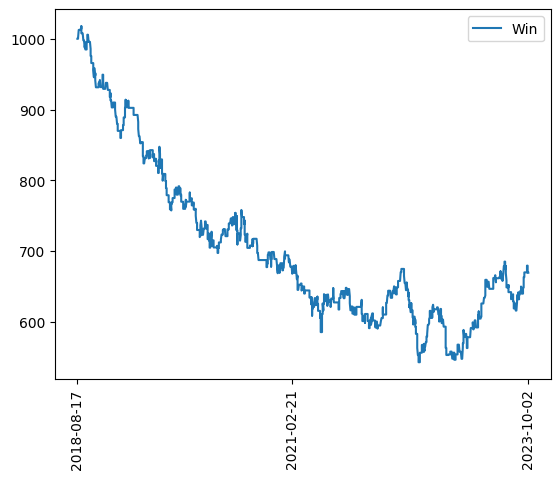

In [1865]:
fig, ax = plt.subplots()
dates = np.array(merged1['Date'])
#ax.plot(dates, bank_graph)
ax.plot(dates, win, label='Win')
ax.tick_params(axis='x',rotation=90)
date_range = [dates[0], dates[len(dates)//2],dates[-1]]#pd.date_range(dates[0], dates[-1], periods = 10).date
#print(list(date_range))
ax.set_xticks(list(date_range))
leg = ax.legend()
plt.show()

In [1854]:
league = 'LaLiga'
test1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/Testing/{league}/{league}_WinTarget.csv')
new1 = pd.read_csv(f'/Users/Gautham/Projects/sports_betting/cache/{league}/new.csv')
merged1 = test1.merge(new1[['GameID', 'TeamWinOdds', 'DrawOdds', 'OpponentWinOdds']], left_on='GameID_x', right_on='GameID').drop_duplicates(['GameID'])

In [1856]:
merged1['avgTeamWinPred'] = merged['class_1_x']#(merged1['class_1_x'] + merged1['class_1_y']) / 2
merged1['impliedTeamWinOdds'] = (1 / merged1['TeamWinOdds'])

In [1857]:
merged1['EVTeamWin'] = (merged1['avgTeamWinPred'] * (merged1['TeamWinOdds'] * betAmt - betAmt)) - (1 - merged1['avgTeamWinPred']) * betAmt 
#merged1['EVOpponentWin'] = (merged1['avgOpponentWinPred'] * (merged1['OpponentWinOdds'] * betAmt - betAmt)) - (1 - merged1['avgOpponentWinPred']) * betAmt 

In [1864]:
bankroll

669.7999999999996

In [978]:
len(set(win))

371